In [12]:
import numpy as np
import cv2
from show_image import show_rgb_image
from show_image import show_images
from datascience import *
import math
%matplotlib inline

---

- ### 회선 (Convolution)
    - #### 출력화소 = 대응되는 위치에 있는 마스크 원소값 * 영상 화소값
    - #### 모든 영상 화소값에 대해 이동하면서 수행
 
![image](https://github.com/kks00/visual_info_processing/assets/68108664/002b6277-64ec-4487-a779-02d7b4e713f9)

---

- ## 블러링
    - #### 영상에서 급격하게 변하는 부분들을 감소시켜 점진적으로 변하게 함
    - #### 영상이 전체적으로 부드러운 느낌이 나게 함

<br>

- ### 블러링 마스크
    - #### 마스크 전체 원소의 합이 1인 모든 원소의 값이 같은 마스크

    <br>

    ![image](https://github.com/kks00/visual_info_processing/assets/68108664/aa155328-daae-4046-98ae-7f813c88b502)


<br>

In [32]:
def make_blur_mask(n): # N X N 마스크 생성
    mask = np.full((n, n), 1/(n ** 2), dtype="float32")
    return mask

def convolution(source, mask):
    mask_n = mask.shape[0]
    source_h, source_w = source.shape
    
    result = np.zeros(source.shape, dtype="float32") # 출력 이미지 생성

    mask_center = mask_n // 2
    center_y, center_x = source_h // 2, source_w // 2
    for center_y in range(mask_center, source_h - mask_center): # 현재 mask가 위치한 지점의 mask 중심점
        for center_x in range(mask_center, source_w - mask_center):
            roi = source[center_y-mask_center:center_y+mask_center+1, center_x-mask_center:center_x+mask_center+1] # 입력 영상에서 마스크가 위치한 지점 추출
            result.itemset((center_y, center_x), np.sum(np.multiply(roi, mask))) # mask와 곱한 값의 합을 결과 영상에 대입
            
    return np.uint8(result)

test_image = np.arange(1, 65, 1).reshape(8, 8)
print("input_image: ")
print(test_image)

print("mask: ")
print(make_blur_mask(3))

result_image = convolution(test_image, make_blur_mask(3))
print("result_image: ")
print(result_image)

input_image: 
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]
 [25 26 27 28 29 30 31 32]
 [33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48]
 [49 50 51 52 53 54 55 56]
 [57 58 59 60 61 62 63 64]]
mask: 
[[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]
result_image: 
[[ 0  0  0  0  0  0  0  0]
 [ 0 10 11 12 13 14 15  0]
 [ 0 18 19 20 21 22 23  0]
 [ 0 26 27 28 29 30 31  0]
 [ 0 34 35 36 37 38 39  0]
 [ 0 42 43 44 45 46 47  0]
 [ 0 50 51 52 53 54 55  0]
 [ 0  0  0  0  0  0  0  0]]


<br>

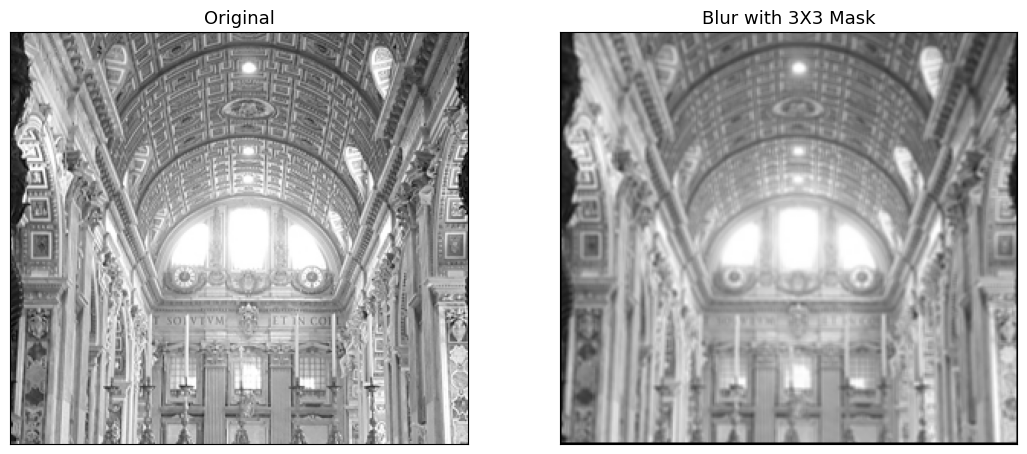

In [35]:
source_img = cv2.imread("./images/chap07/filter_blur.jpg", cv2.IMREAD_GRAYSCALE)
result_image = convolution(source_img, make_blur_mask(3))
show_images({"Original": source_img, "Blur with 3X3 Mask": result_image}, 13)

---

- ## 샤프닝
    - #### 이웃 화소끼리 차이를 크게 되도록 출력 화소를 만들어 날카로운 느낌이 나게 만드는 것

<br>

- ### 샤프닝 마스크
    - #### 전체 원소값의 합이 1이고, 중심 계수와 주변 계수들의 차이를 크게 만든 형태

     <br>
     
    ![image](https://github.com/kks00/visual_info_processing/assets/68108664/559b14af-7106-4721-966c-cdb03387fe18)


<br>

In [38]:
mask1 = np.array([0, -1, 0, -1, 5, -1, 0, -1, 0]).reshape(3, 3)
print("mask1: ")
print(mask1)

mask2 = np.array([-1, -1, -1, -1, 9, -1, -1, -1, -1]).reshape(3, 3)
print("mask2: ")
print(mask2)

mask1: 
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
mask2: 
[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


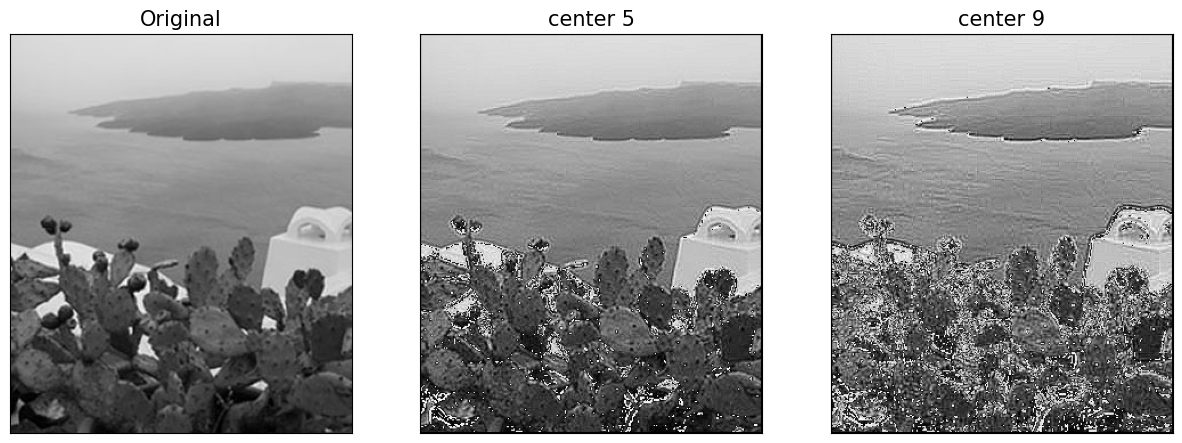

In [41]:
source_img = cv2.imread("./images/chap07/filter_sharpen.jpg", cv2.IMREAD_GRAYSCALE)

mask1_sharpen = convolution(source_img, mask1)
mask2_sharpen = convolution(source_img, mask2)

show_images({"Original": source_img, "center 5": mask1_sharpen, "center 9": mask2_sharpen}, 15)

- ### 중심계수가 5인 마스크 적용한 이미지
    - #### 경계선 뚜렷해짐

- ### 중심계수가 9인 마스크 적용한 이미지
    - #### 노이즈까지 강조됨

---